# Введение в численные методы оптимизации (Ю. Е. Нестеров Введение в выпуклую оптимизацию, гл. 1 $\S$ 1.1)

 1. Обзор материала весеннего семестра
 2. Постановка задачи
 3. Общая схема решения
 4. Сравнение методов оптимизации
 5. Методы одномерной минимизации


## Обзор материала весеннего семестра

Также на [странице курса](https://github.com/amkatrutsa/MIPT-Opt#spring-term).

1. Методы решения задач **безусловной** оптимизации
    - Одномерная минимизация (**уже сегодня!**)
    - Градиентный спуск
    - Метод Ньютона
    - Квазиньютоновские методы
    - Метод сопряжённых градиентов  
    - Опционально:
        - Решение задачи наименьших квадратов
        - Оптимальные методы и нижние оценки
2. Методы решения задач **условной** оптимизации
    - Методы проекции градиента и условного градиента
    - Методы штрафных и барьерных функций
    - Метод модифицированой функции Лагранжа

## Организация работы в семестре

1. Семинар и лекция раз в неделю
2. Два задания в течение семестра
3. Midterm в середине семестра
4. Итоговая контрольная в конце семестра
5. Экзамен в конце семестра (схема выставления оценки аналогична осеннему семестру)
6. Миниконтрольные в начале каждого семинара
7. Домашнее задание почти каждую неделю: $\TeX$ или Jupyter Notebook

## Постановка задачи

\begin{equation}
\begin{split}
& \min_{x \in S} f_0(x)\\
\text{s.t. } & f_j(x) = 0, \; j = 1,\ldots,m\\
& g_k(x) \leq 0, \; k = 1,\ldots,p
\end{split}
\end{equation}
где $S \subseteq \mathbb{R}^n$, $f_j: S \rightarrow \mathbb{R}, \; j = 0,\ldots,m$, $g_k: S \rightarrow \mathbb{R}, \; k=1,\ldots,p$

Все функции как минимум непрерывны. 

Важный факт</span>: задачи **нелинейной** оптимизации 

в их самой общей форме являются **численно неразрешимыми**!

## Аналитические результаты
- Необходимое условие первого порядка: 

если $x^*$ точка локального минимума дифференцируемой функции $f(x)$, тогда 
$$
f'(x^*) = 0
$$
- Необходимое условие второго порядка 

если $x^*$ точка локального минимума дважды дифференцируемой функции $f(x)$, тогда 

$$
f'(x^*) = 0 \quad \text{и} \quad f''(x^*) \succeq 0
$$
- Достаточное условие: 

пусть $f(x)$ дважды дифференцируемая функция, и пусть точка $x^*$ удовлетворяет условиям

$$
f'(x^*) = 0 \quad f''(x^*) \succ 0,
$$
тогда $x^*$ является точкой строго локального минимума функции $f(x)$.

**Замечание**: убедитесь, что Вы понимаете, как доказывать эти

результаты!

## Особенности численного решения

1. Точно решить задачу принципиально невозможно из-за погрешности машинной арифметики
2. Необходимо задать критерий обнаружения решения
3. Необходимо определить, какую информацию о задаче использовать

## Общая итеративная схема

Дано: начальное приближение $x$, требуемая точность $\varepsilon$.

```python
def GeneralScheme(x, epsilon):
    
    while StopCriterion(x) > epsilon:
        
        OracleResponse = RequestOracle(x)
        
        UpdateInformation(I, x, OracleResponse)
        
        x = NextPoint(I, x)
        
    return x
```

### Вопросы
1. Какие критерии остановки могут быть?
2. Что такое оракул и зачем он нужен?
3. Что такое информационная модель?
4. Как вычисляется новая точка?

#### Критерии остановки
1. Сходимость по аргументу: 
$$
\| x_k - x^*  \|_2 < \varepsilon
$$ 
2. Сходимость по функции: 
$$
\| f_k - f^* \|_2 < \varepsilon
$$ 
3. Выполнение необходимого условия 
$$
\| f'(x_k) \|_2 < \varepsilon
$$

Но ведь $x^*$ неизвестна!

Тогда

\begin{align*}
& \|x_{k+1} - x_k \| = \|x_{k+1} - x_k + x^* - x^* \| \leq \\
& \|x_{k+1} - x^* \| + \| x_k - x^* \| \leq 2\varepsilon
\end{align*}

Аналогично для сходимости по функции, 

однако иногда можно оценить $f^*$! 

**Замечание**: лучше использовать относительные изменения 

этих величин! 

Например $\dfrac{\|x_{k+1} - x_k \|_2}{\| x_k \|_2}$


#### Что такое оракул?
**Определение**: оракулом называют некоторое абстрактное 

устройство, которое отвечает на последовательные вопросы 

метода

Аналогия из ООП: 

- оракул - это виртуальный метод базового класса
- каждая задача - производный класс
- оракул определяется для каждой задачи отдельно согласно общему определению в базовом классе

**Концепция чёрного ящика**
1. Единственной информацией, получаемой в ходе работы итеративного метода, являются ответы оракула
2. Ответы оракула являются *локальными*

#### Информация о задаче
1. Каждый ответ оракула даёт **локальную** информацию о поведении функции в точке
2. Агрегируя все полученные ответы оракула, обновляем информацию о **глобальном** виде целевой функции:
    - кривизна
    - направление убывания
    - etc

#### Вычисление следующей точки

$$
x_{k+1} = x_{k} + \alpha_k h_k
$$

- **Линейный поиск**: фиксируется направление $h_k$ и производится поиск по этому направлению "оптимального" значения  $\alpha_k$
- **Метод доверительных областей**: фиксируется допустимый размер *области* по некоторой норме $\| \cdot  \| \leq \alpha$ и *модель* целевой функции, которая хорошо её аппроксимирует в выбранной области. 
    
    Далее производится поиск направления $h_k$, минимизирующего модель целевой функции и не выводящего точку $x_k + h_k$ за пределы доверительной области

#### Вопросы
1. Как выбрать $\alpha_k$?
2. Как выбрать $h_k$?
3. Как выбрать модель?
4. Как выбрать область?
5. Как выбрать размер области? 

<span style="color:red">
    В курсе рассматривается только линейный поиск!</span> 
    
Однако несколько раз копцепция метода доверительных областей 

будет использована.

## Как сравнивать методы оптимизации?
Для заданного класса задач сравнивают следующие величины:
1. Сложность
    - аналитическая: число обращений к оракулу для решения задачи с точностью $\varepsilon$
    - арифметическая: общее число всех вычислений, необходимых для решения задачи с точностью $\varepsilon$
2. Скорость сходимости
3. Эксперименты

### Скорости сходимости 
1. Сублинейная
$$
\| x_{k+1} - x^* \|_2 \leq C k^{\alpha},
$$
где $\alpha < 0$ и $ 0 < C < \infty$
2. Линейная (геометрическая прогрессия)
$$
\| x_{k+1} - x^* \|_2 \leq Cq^k, 
$$
где $q \in (0, 1)$ и $ 0 < C < \infty$

3. Сверхлинейная 
$$
\| x_{k+1} - x^* \|_2 \leq Cq^{k^p}, 
$$
где $q \in (0, 1)$, $ 0 < C < \infty$ и $p > 1$
4. Квадратичная
$$
\| x_{k+1} - x^* \|_2 \leq C\| x_k - x^* \|^2_2, \qquad \text{или} \qquad \| x_{k+1} - x^* \|_2 \leq C q^{2^k}
$$
где $q \in (0, 1)$ и $ 0 < C < \infty$

### Оптимальные методы: can we do better?
- Доказывают нижние оценки скоростей сходимости для класса задач и методов фиксированного порядка
- Предлагают методы, на которых эти нижние оценки достигаются $\Rightarrow$ доказана оптимальность 
- Ниже про значение теорем сходимости

Оптимальным методам и нижним оценкам будет, возможно, 

посвящён отдельный семинар или часть домашнего задания.

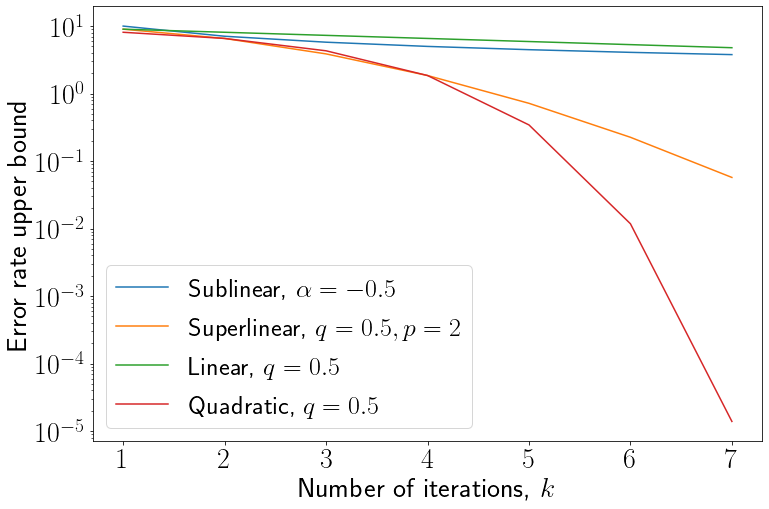

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

USE_COLAB = False
if not USE_COLAB:
    plt.rc("text", usetex=True)

import numpy as np
C = 10
alpha = -0.5
q = 0.9
num_iter = 7
sublinear = np.array([C * k**alpha for k in range(1, num_iter + 1)])
linear = np.array([C * q**k for k in range(1, num_iter + 1)])
superlinear = np.array([C * q**(k**2) for k in range(1, num_iter + 1)])
quadratic = np.array([C * q**(2**k) for k in range(1, num_iter + 1)])
plt.figure(figsize=(12,8))
plt.semilogy(np.arange(1, num_iter+1), sublinear, 
             label=r"Sublinear, $\alpha = -0.5$")
plt.semilogy(np.arange(1, num_iter+1), superlinear, 
             label=r"Superlinear, $q = 0.5, p=2$")
plt.semilogy(np.arange(1, num_iter+1), linear, 
             label=r"Linear, $q = 0.5$")
plt.semilogy(np.arange(1, num_iter+1), quadratic, 
             label=r"Quadratic, $q = 0.5$")
plt.xlabel("Number of iterations, $k$", fontsize=28)
plt.ylabel("Error rate upper bound", fontsize=28)
plt.legend(loc="best", fontsize=26)
plt.xticks(fontsize = 28)
_ = plt.yticks(fontsize = 28)

### Значение теорем сходимости (Б.Т. Поляк Введение в оптимизацию, гл. 1, $\S$ 6)
1. Что дают теоремы сходимости
     - класс задач, для которых можно рассчитывать на применимость метода (важно не завышать условия!)
         - выпуклость
         - гладкость
     - качественное поведение метода
         - существенно ли начальное приближение
         - по какому функционалу есть сходимость
     - оценку скорости сходимости
         - теоретическая оценка поведения метода без проведения экспериментов
         - определение факторов, которые влияют на сходимость (обусловленность, размерность, etc)
         - иногда заранее можно выбрать число итераций для достижения заданной точности 

2. Что **НЕ** дают теоремы сходимости
    - сходимость метода **ничего не говорит** о целесообразности его применения
    - оценки сходимости зависят от неизвестных констант - неконструктивный характер
    - учёт ошибок округления и точности решения вспомогательных задач
    
**Мораль**: нужно проявлять разумную осторожность 

и здравый смысл!

## Классификация задач
1. Безусловная оптимизация
    - целевая функция липшицева
    - градиент целевой функции липшицев
2. Условная оптимизация
    - многогранник
    - множество простой структуры
    - общего вида

## Классификация методов
1. Методы нулевого порядка: оракул возвращает только значение функции $f(x)$

2. Методы первого порядка: оракул возвращает значение функции $f(x)$ и её градиент $f'(x)$

3. Методы второго порядка: оракул возвращает значение функции $f(x)$, её градиент $f'(x)$ и гессиан $f''(x)$.

**Вопрос**: существуют ли методы более высокого порядка?

1. Одношаговые методы 
$$
x_{k+1} = \Phi(x_k)
$$
2. Многошаговые методы
$$
x_{k+1} = \Phi(x_k, x_{k-1}, ...)
$$

## Одномерная минимизация
**Определение**. Функция $f(x)$ называется унимодальной на $[a, b]$, если существует такая точка $x^* \in [a, b]$, что 
- $f(x_1) > f(x_2)$ для любых $a \leq x_1 < x_2 < x^*$, 

и 
- $f(x_1) < f(x_2)$ для любых $x^* < x_1 < x_2 \leq b$.

**Вопрос**: какая геометрия унимодальных функций?

### Метод дихотомии

Идея из информатики первого семестра: 

делим отрезок $[a,b]$ на две равные части

пока не найдём минимум унимодальной функции.

- $N$ - число вычислений функции $f$
- $K = \frac{N - 1}{2}$ - число итераций

Тогда
$$
|x_{K+1} - x^*| \leq \frac{b_{K+1} - a_{K+1}}{2} = \left( \frac{1}{2} \right)^{\frac{N-1}{2}} (b - a) \approx 0.5^{K} (b - a) 
$$

In [5]:
def binary_search(f, a, b, epsilon, callback=None):
    c = (a + b) / 2.0
    while abs(b - a) > epsilon:
#         Check left subsegment
        y = (a + c) / 2.0
        if f(y) <= f(c):
            b = c
            c = y
        else:
#         Check right subsegment
            z = (b + c) / 2.0
            if f(c) <= f(z):
                a = y
                b = z
            else:
                a = c
                c = z
        if callback is not None:
            callback(a, b)
    return c

In [6]:
def my_callback(a, b, left_bound, right_bound, approximation):
    left_bound.append(a)
    right_bound.append(b)
    approximation.append((a + b) / 2.0)

9.313225746154785e-10


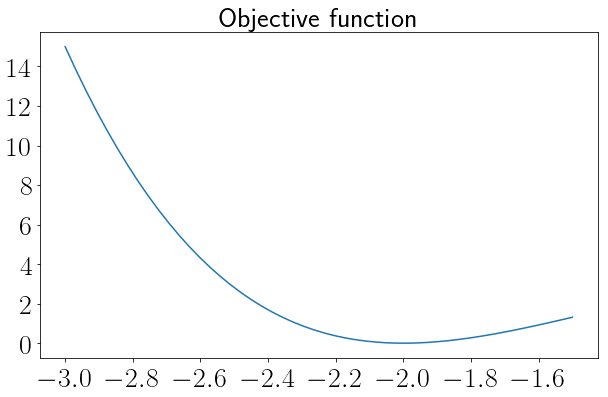

In [8]:
import numpy as np

left_boud_bs = []
right_bound_bs = []
approximation_bs = []

callback_bs = lambda a, b: my_callback(a, b, 
            left_boud_bs, right_bound_bs, approximation_bs)

# Target unimodal function on given segment
f = lambda x: (x - 2) * x * (x + 2)**2 # np.power(x+2, 2)
# f = lambda x: -np.sin(x)
x_true = -2
# x_true = np.pi / 2.0
a = -3
b = -1.5
epsilon = 1e-8
x_opt = binary_search(f, a, b, epsilon, callback_bs)
print(np.abs(x_opt - x_true))
plt.figure(figsize=(10,6))
plt.plot(np.linspace(a,b), f(np.linspace(a,b)))
plt.title("Objective function", fontsize=28)
plt.xticks(fontsize = 28)
_ = plt.yticks(fontsize = 28)

### Метод золотого сечения
Идея: 

делить отрезок $[a,b]$ не на две равные насти, 

а в пропорции "золотого сечения".

Оценим скорость сходимости аналогично методу дихотомии:

$$
|x_{K+1} - x^*| \leq b_{K+1} - a_{K+1} = \left( \frac{1}{\tau} \right)^{N-1} (b - a) \approx 0.618^K(b-a),
$$
где $\tau = \frac{\sqrt{5} + 1}{2}$.

- Константа геометрической прогрессии **больше**, чем у метода дихотомии
- Количество вызовов функции **меньше**, чем у метода дихотомии

In [9]:
def golden_search(f, a, b, tol=1e-5, callback=None):
    tau = (np.sqrt(5) + 1) / 2.0
    y = a + (b - a) / tau**2
    z = a + (b - a) / tau
    while b - a > tol:
        if f(y) <= f(z):
            b = z
            z = y
            y = a + (b - a) / tau**2
        else:
            a = y
            y = z
            z = a + (b - a) / tau
        if callback is not None:
            callback(a, b)
    return (a + b) / 2.0

In [10]:
left_boud_gs = []
right_bound_gs = []
approximation_gs = []

cb_gs = lambda a, b: my_callback(a, b, left_boud_gs, right_bound_gs, approximation_gs)
x_gs = golden_search(f, a, b, epsilon, cb_gs)

print(f(x_opt))
print(f(x_gs))
print(np.abs(x_opt - x_true))

6.93889390875399e-18
9.549014390504221e-18
9.313225746154785e-10


### Сравнение методов одномерной минимизации

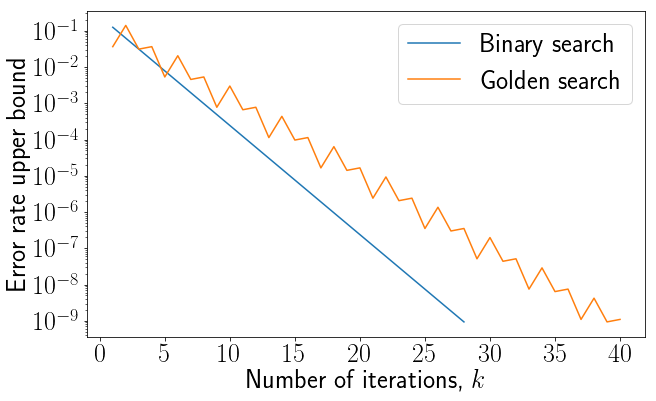

In [14]:
plt.figure(figsize=(10,6))
plt.semilogy(np.arange(1, len(approximation_bs) + 1), np.abs(x_true - np.array(approximation_bs, dtype=np.float64)), label="Binary search")
plt.semilogy(np.arange(1, len(approximation_gs) + 1), np.abs(x_true - np.array(approximation_gs, dtype=np.float64)), label="Golden search")
plt.xlabel(r"Number of iterations, $k$", fontsize=26)
plt.ylabel("Error rate upper bound", fontsize=26)
plt.legend(loc="best", fontsize=26)
plt.xticks(fontsize = 26)
_ = plt.yticks(fontsize = 26)

In [8]:
%timeit binary_search(f, a, b, epsilon)
%timeit golden_search(f, a, b, epsilon)

22.6 µs ± 1.13 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
84.1 µs ± 6.64 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


## Пример иного поведения методов

$$
f(x) = \sin(\sin(\sin(\sqrt{x}))), \; x \in [2, 60]
$$

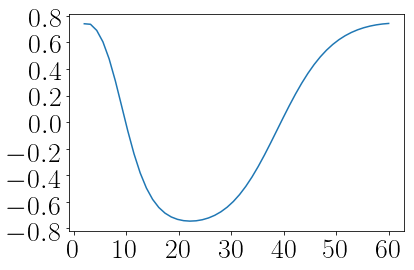

In [16]:
f = lambda x: np.sin(np.sin(np.sin(np.sqrt(x))))
x_true = (3 * np.pi / 2)**2
a = 2
b = 60
epsilon = 1e-8
plt.plot(np.linspace(a,b), f(np.linspace(a,b)))
plt.xticks(fontsize = 28)
_ = plt.yticks(fontsize = 28)

## Сравнение скорости сходимости и времени работы методов

### Метод дихотомии

In [17]:
left_boud_bs = []
right_bound_bs = []
approximation_bs = []

callback_bs = lambda a, b: my_callback(a, b, 
            left_boud_bs, right_bound_bs, approximation_bs)

x_opt = binary_search(f, a, b, epsilon, callback_bs)
print(np.abs(x_opt - x_true))

2.1968899233115735e-07


### Метод золотого сечения

In [23]:
left_boud_gs = []
right_bound_gs = []
approximation_gs = []

cb_gs = lambda a, b: my_callback(a, b, left_boud_gs, right_bound_gs, approximation_gs)
x_gs = golden_search(f, a, b, epsilon, cb_gs)

print(np.abs(x_opt - x_true))

2.1968899233115735e-07


### Сходимость

Text(0,0.5,'Error rate upper bound')

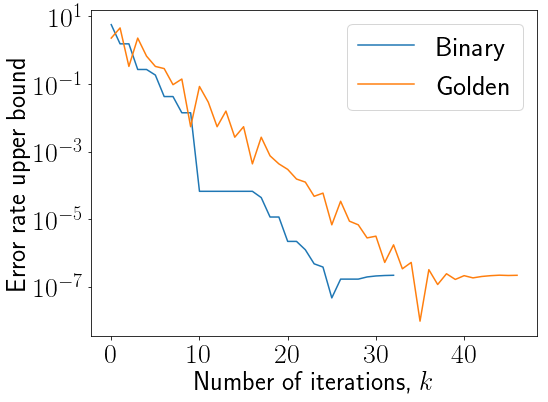

In [24]:
plt.figure(figsize=(8,6))
plt.semilogy(np.abs(x_true - np.array(approximation_bs, dtype=np.float64)), label="Binary")
plt.semilogy(np.abs(x_true - np.array(approximation_gs, dtype=np.float64)), label="Golden")
plt.legend(fontsize=28)
plt.xticks(fontsize=28)
_ = plt.yticks(fontsize=28)
plt.xlabel(r"Number of iterations, $k$", fontsize=26)
plt.ylabel("Error rate upper bound", fontsize=26)

### Время работы

In [13]:
%timeit binary_search(f, a, b, epsilon)
%timeit golden_search(f, a, b, epsilon)

455 µs ± 35.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
416 µs ± 26.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


## Резюме
1. Введение в численные методы оптимизации
2. Общая схема работы метода
3. Способы сравнения методов оптимизации
4. Зоопарк задач и методов
5. Одномерная минимизация